In [1]:
from pyscf import gto, scf
import numpy as np

In [8]:
import pyscf.hessian.thermo as thermo

mol =   gto.Mole( atom='''
    Na    0.0000000    0.0000000    1.205
    Cl    0.0000000    0.0000000   -1.205
    '''
    , basis='3-21g', symmetry=False, cart=False).build()

mf = scf.RHF(mol)
mf.verbose = 0
mf.max_cycle = 100
mf.kernel()
dm = mf.make_rdm1()

In [ ]:
from Dynamics import EhrenDynamics
ehmd = EhrenDynamics(mf)
ehmd.nd_step_size = 4
ehmd.nd_max_step  = 2000
ehmd.nd_sub_step_size = 0.4
ehmd.nd_sub_max_step  = 10
ehmd.num_time_scale = 3
ehmd.ed_step_size = 0.04
ehmd.ed_max_step  = 10
ehmd.ed_prop_method = 'mmut'
ehmd.vib_ene_init = 1.16
ehmd.kernel()
ene = ehmd.momenta2ene(ehmd.momenta_init)


Step of Ehtenfest dynamics:  1
Step of Ehtenfest dynamics:  2
Step of Ehtenfest dynamics:  3
Step of Ehtenfest dynamics:  4
Step of Ehtenfest dynamics:  5
Step of Ehtenfest dynamics:  6
Step of Ehtenfest dynamics:  7
Step of Ehtenfest dynamics:  8
Step of Ehtenfest dynamics:  9
Step of Ehtenfest dynamics:  10
Step of Ehtenfest dynamics:  11
Step of Ehtenfest dynamics:  12
Step of Ehtenfest dynamics:  13
Step of Ehtenfest dynamics:  14
Step of Ehtenfest dynamics:  15
Step of Ehtenfest dynamics:  16
Step of Ehtenfest dynamics:  17
Step of Ehtenfest dynamics:  18
Step of Ehtenfest dynamics:  19
Step of Ehtenfest dynamics:  20
Step of Ehtenfest dynamics:  21
Step of Ehtenfest dynamics:  22
Step of Ehtenfest dynamics:  23
Step of Ehtenfest dynamics:  24
Step of Ehtenfest dynamics:  25
Step of Ehtenfest dynamics:  26
Step of Ehtenfest dynamics:  27
Step of Ehtenfest dynamics:  28
Step of Ehtenfest dynamics:  29
Step of Ehtenfest dynamics:  30
Step of Ehtenfest dynamics:  31
Step of Ehtenfest

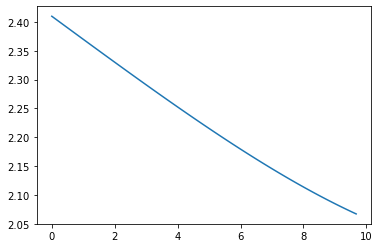

In [6]:
import matplotlib.pyplot as plt

time1 = ehmd.ntime
geo1  = ehmd.ncoords * 0.5291772
etot1 = ehmd.netot
momenta1 = ehmd.nmomenta
Etot1 = ehmd.nE_tot

bond_length1 = np.zeros(len(time1))
sq_sum = 0
for i in range(0, len(time1)):
    for j in range(0,3):
        sq_sum += np.power(geo1[i][1][j]-geo1[i][0][j],2)     
    bond_length1[i] = np.sqrt(sq_sum)
    sq_sum = 0
plt.plot(time1 * 0.02418884254, bond_length1)


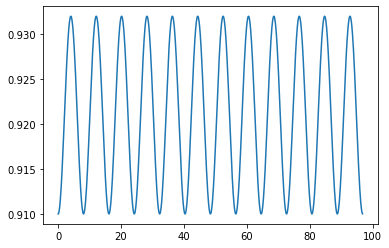

In [20]:
import matplotlib.pyplot as plt

time2 = md.ntime
geo2  = md.ncoords * 0.5291772
etot2 = md.netot
Etot2 = md.nE_tot
bond_length2 = []
sq_sum = 0
for i in range(0, len(time2)):
    for j in range(0,3):
        sq_sum += np.power(geo2[i][1][j]-geo2[i][0][j],2)   
    if sq_sum > 0.0000001:
        bond_length2.append(np.sqrt(sq_sum))
    sq_sum = 0

plt.plot(time2 * 0.02418884254, bond_length2)


[-0.76557659 -0.76557659 -0.76557659 ... -0.76557574 -0.76557574
 -0.76557575]


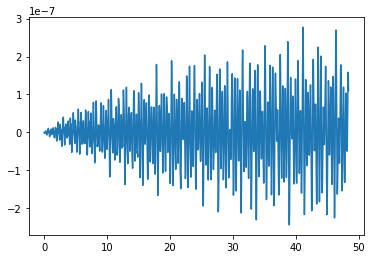

In [84]:
import matplotlib.pyplot as plt

time = ed.ntime
pop  = ed.npop
e = ed.netot
dip = ed.ndip

plt.plot(time * 0.02418884254, pop[:,0]-pop2[:,0])
print(pop2[:,1])